In [1]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA 

import matplotlib
import matplotlib.pyplot as plt

In [2]:
def read_data(file, f_names, f_info):

    #read names
    with open(f_names, 'r') as f:
        l3=f.readlines()

    l3=[l3[j].replace('\n','') for j in range(len(l3))]


    #read info
    
    with open(f_info, 'r') as f:
        l2=f.readlines()
    

    l2=[l2[j].replace('\n','').split('\t') for j in range(len(l2))]




    dct={}
    for j in range(len(l2)):
        dct[l2[j][0]]=[l2[j][1], l2[j][3]]

    
    list_pop = []
    for j in l3:
        list_pop.append(dct[j][1])


    

    
    #read genotypes
    with open(file, 'r') as f:
        l=f.readlines()
    
    l=[l[j].replace(' \n','').replace('|','').split('\t')[3].split(' ') for j in range(len(l))]
    
    x_t=[]
    for j in range(len(l)):
        m=[]
        for k in range(len(l[j])):
            if l[j][k]=='00':
                m.append(0)
            elif l[j][k]=='11':
                m.append(2)
            else:
                m.append(1)
        x_t.append(np.array(m))
                
    x_t=np.array(x_t).transpose()     
    df=pd.DataFrame(x_t)

    df1=pd.concat([pd.DataFrame(list_pop, columns=['Pop']), pd.DataFrame(l3,columns=['ID'])], axis=1, join="inner" )
    return pd.concat([df, df1], axis=1, join="inner")



DF = read_data('chr22.pca.txt', 'IBS.YRI.MEX.txt', 'IBS.YRI.MEX.info.txt')

In [3]:
#group by some properties such as population, gender, etc.

def groupByPop(x, y, classLabels, save_fig):   

    #сгруппируем точки по принадлежности к разным популяциям (один цвет - одна популяция)


    classDict = {}
    classes = np.unique(classLabels)
    for label in classes:
        idx = np.where(classLabels == label)
        classDict[label] = (x[idx], y[idx])
    for lab in classes:
        x, y = classDict[lab]
        plt.scatter(x, y, label=lab)
    plt.legend(fontsize=12)
    plt.xlabel('PC1', fontsize=10)
    plt.ylabel('PC2', fontsize=10)
    plt.savefig(save_fig, format='png')
    plt.show()

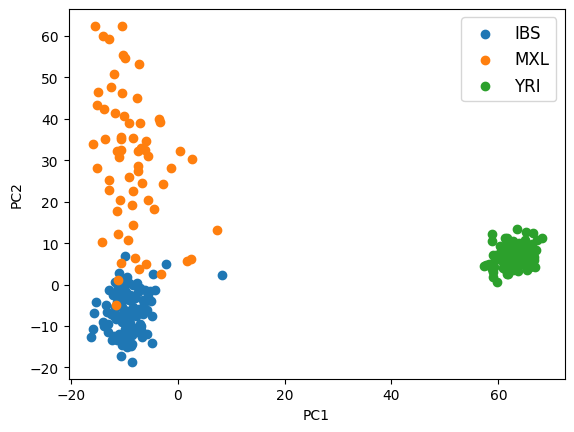

In [4]:
DF = read_data('chr22.pca.txt', 'IBS.YRI.MEX.txt', 'IBS.YRI.MEX.info.txt')
X=DF.drop(['Pop', 'ID'],axis=1)
X=X.to_numpy()
pca = PCA(n_components=3)
pca.fit(X) 
lab=DF['Pop']


projectedPrincipal = np.matmul(X, pca.components_[0]) #проекция X на первую главную компоненту 
projectedSecondary = np.matmul(X, pca.components_[1]) #проекция X на вторую главную компоненту
projectedTertiary = np.matmul(X, pca.components_[2]) #проекция X на третью главную компоненту

groupByPop(projectedPrincipal, projectedSecondary, lab, 'PCA.image.22.png')



In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

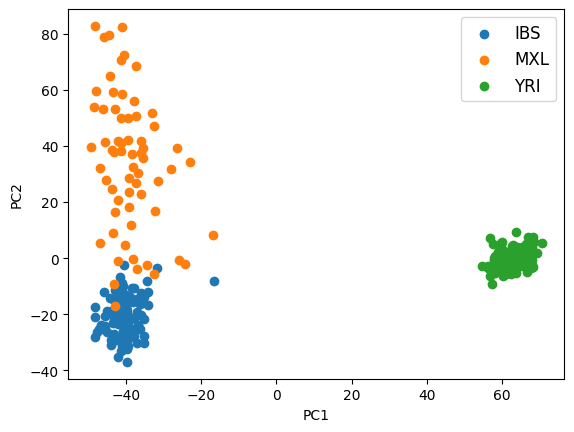

In [10]:
pca.fit(X_scaled) 
lab=DF['Pop']


projectedPrincipal = np.matmul(X_scaled, pca.components_[0]) #проекция X на первую главную компоненту 
projectedSecondary = np.matmul(X_scaled, pca.components_[1]) #проекция X на вторую главную компоненту
projectedTertiary = np.matmul(X_scaled, pca.components_[2]) #проекция X на третью главную компоненту

groupByPop(projectedPrincipal, projectedSecondary, lab, 'PCA.image.22.png')

In [ ]:
cov_matrix = np.cov(X_scaled, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)